In [2]:
import numpy as np
import pandas as pd
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [3]:
data=np.genfromtxt('phis_data.csv',delimiter=',',dtype=np.int32)

Taking all columns except 'result' as inputs

In [4]:
inp=data[:,:-1]

Taking 'result' column as output

In [5]:
out=data[:,-1]

In [6]:
data.shape

(11055, 31)

In [7]:
df=pd.DataFrame(data)

In [8]:
df.columns=['having_ip','url_len','short_serv','having_@_symb','double_slash_redir','prefix_suffix','having_sub_domain','ssl_final_state','domain_reg_len','favicon','port','https_token','req_url','url_of_anchor','links_in_tags','sfh','submitting_to_email','abnormal_url','redirect','on_mouseover','right_click','pop_up','i_frame','age_of_domain','dns_record','web_traff','page_rank','google_ind','links_to_page','stat_rep','result']

Data is represented as binary values for Logistic Regression. Attribute values ranging form -1 to 1 indicate strength.

In [9]:
df

,having_ip,url_len,short_serv,having_@_symb,double_slash_redir,prefix_suffix,having_sub_domain,ssl_final_state,domain_reg_len,favicon,...,pop_up,i_frame,age_of_domain,dns_record,web_traff,page_rank,google_ind,links_to_page,stat_rep,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


Taking a 7:3 training-testing ratio

In [10]:
tra_inp=inp[:7738]
tra_out=out[:7738]
tes_inp=inp[7738:]
tes_out=out[7738:]

In [11]:
df.isnull().sum()

having_ip              0
url_len                0
short_serv             0
having_@_symb          0
double_slash_redir     0
prefix_suffix          0
having_sub_domain      0
ssl_final_state        0
domain_reg_len         0
favicon                0
port                   0
https_token            0
req_url                0
url_of_anchor          0
links_in_tags          0
sfh                    0
submitting_to_email    0
abnormal_url           0
redirect               0
on_mouseover           0
right_click            0
pop_up                 0
i_frame                0
age_of_domain          0
dns_record             0
web_traff              0
page_rank              0
google_ind             0
links_to_page          0
stat_rep               0
result                 0
dtype: int64

No null values indicate clean data

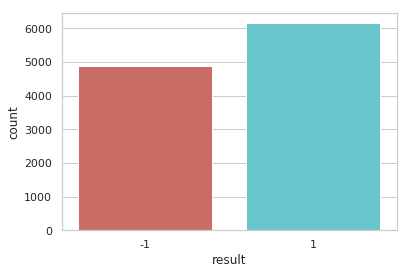

In [12]:
sns.countplot(x='result',data=df,palette='hls')

In [13]:
alg=LogisticRegression()

In [14]:
alg.fit(tra_inp,tra_out)

/home/abhishek/pyth/jup/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
pred=alg.predict(tes_inp)

In [16]:
print(alg.score(tes_inp,tes_out))

0.9002110340669279


In [17]:
x=accuracy_score(tes_out,pred)

In [18]:
accur=x*100
print("ACCURACY OF THE FIT ={:.2f} %".format(accur))

ACCURACY OF THE FIT =90.02 %


In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Confusion matrix

In [20]:
conf_mat=confusion_matrix(tes_out,pred)

In [21]:
print(conf_mat)

[[1256  208]
 [ 123 1730]]


### Interpreting confusion matrix

Diagonal elements of the confusion matrix represented correct predictions , whereas non-diagonal elements represent incorrect predictions.

In our case , out of 3317 testing data , 1256+1730=2986 predictions were correct , whereas 208+123=331 predictions were incorrect

# Classification Report

In [22]:
print(classification_report(tes_out,pred))

              precision    recall  f1-score   support

          -1       0.91      0.86      0.88      1464
           1       0.89      0.93      0.91      1853

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



### Interpreting classification report

TP (True Positive) := case was positive and predicted positive

TN (True Negative) := case was negative and predicted negative

FP (False Positive) := case was negative but predicted positive

FN (False Negative) := case was positive but predicted negative



###### Precision := The percentage of correct predictions
###### Recall := Percentage of positive cases predicted
###### f1-score:= What percentage of positve predictions were correct

We have got an average of 90% in the classification report .  Which indicates that the model is accurate.

# ROC curve


In [23]:
pred_p=alg.predict_proba(tes_inp)[::,1]

In [24]:
fpr,tpr,_=metrics.roc_curve(tes_out,pred_p)

In [25]:
auc=metrics.roc_auc_score(tes_out,pred_p)

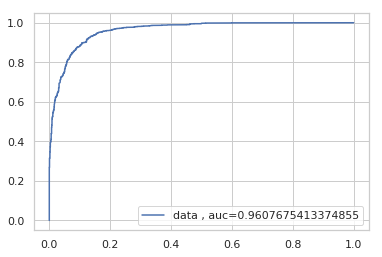

In [26]:
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()

###### ROC measures True Positives against False Positives
 an AUC score of 1 represents perfect classifier and 0.5 indicates meaningless classifier